In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator

In [2]:
path = '../data/ekonomi.csv'
data = pd.read_csv(path, delimiter=';')


In [3]:
data.dtypes

id                                int64
kode_provinsi                     int64
nama_provinsi                    object
jumlah_pengeluaran_per_kapita    object
satuan                           object
tahun                             int64
dtype: object

In [4]:
data.isnull().sum()

id                               0
kode_provinsi                    0
nama_provinsi                    0
jumlah_pengeluaran_per_kapita    0
satuan                           0
tahun                            0
dtype: int64

In [5]:
# Mengubah tipe data
data['jumlah_pengeluaran_per_kapita']=data['jumlah_pengeluaran_per_kapita'].str.replace(',','.').astype(float)

In [7]:
#Standarisasi data
X=data[['jumlah_pengeluaran_per_kapita']]
X_scaled=StandardScaler().fit_transform(X)

# KMeans

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib

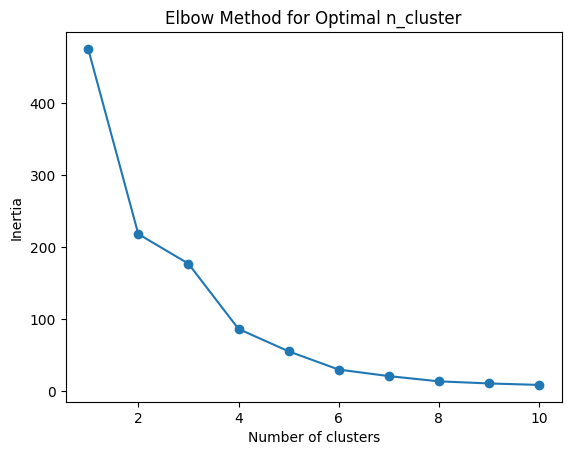

In [8]:
#List untuk menyimpan nilai inertia
inertia = []
# Jangkauan nilai n_cluster yang ingin diuji
n_cluster_range = range(1, 11)

# Melakukan clustering untuk setiap nilai n_cluster dan menghitung inertia
for k in n_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot grafik inertia terhadap jumlah cluster
plt.plot(n_cluster_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal n_cluster')
plt.show()


In [9]:
# Melakukan clustering dengan n_cluster optimal
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
# Menambahkan label cluster ke dalam data
data['cluster'] = kmeans.labels_

Silhouette Score: 0.5766758374177581


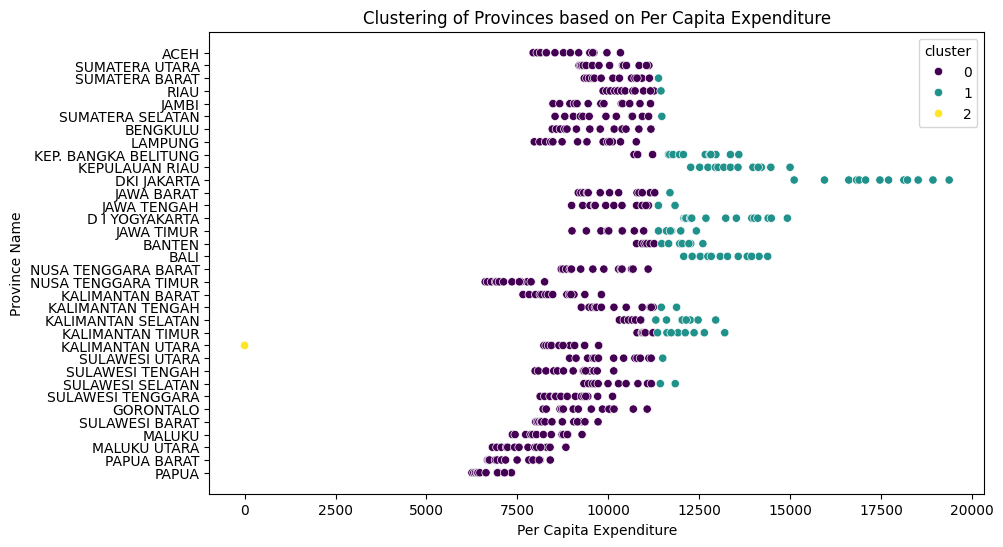

In [10]:
# Evaluasi clustering dengan silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='jumlah_pengeluaran_per_kapita', y='nama_provinsi', hue='cluster', palette='viridis', legend='full')
plt.title('Clustering of Provinces based on Per Capita Expenditure')
plt.xlabel('Per Capita Expenditure')
plt.ylabel('Province Name')
plt.show()

# Agglomerative Clustering

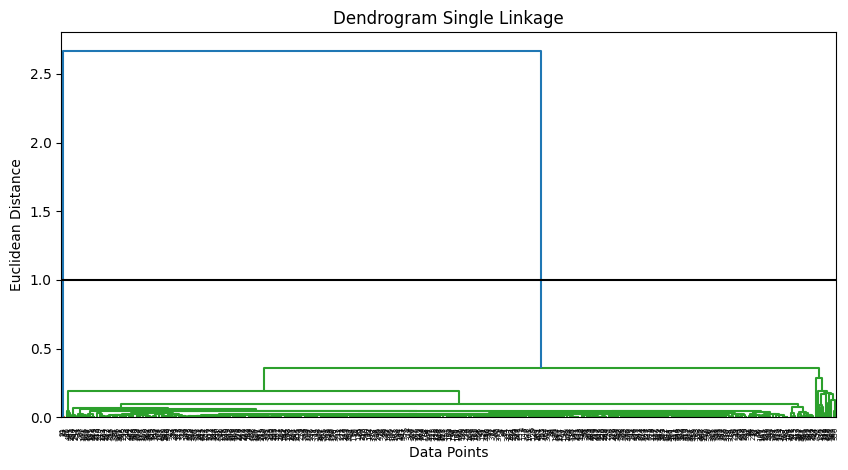

Nilai k optimal untuk metode Single linkage adalah: 2 


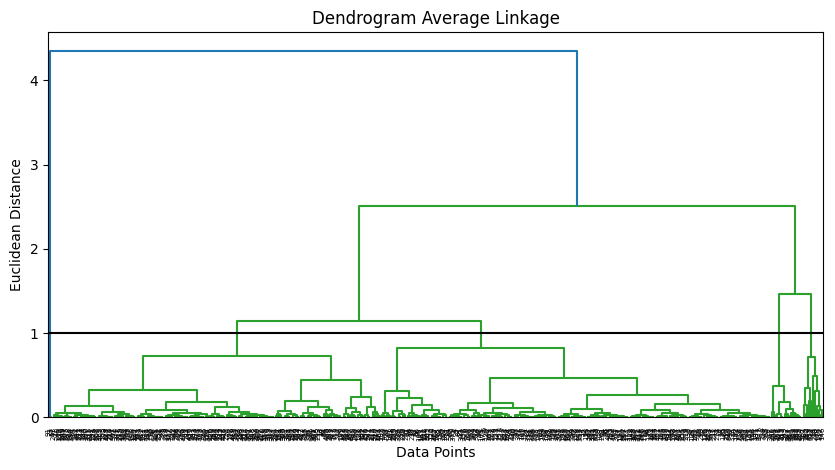

Nilai k optimal untuk metode Average linkage adalah: 2 


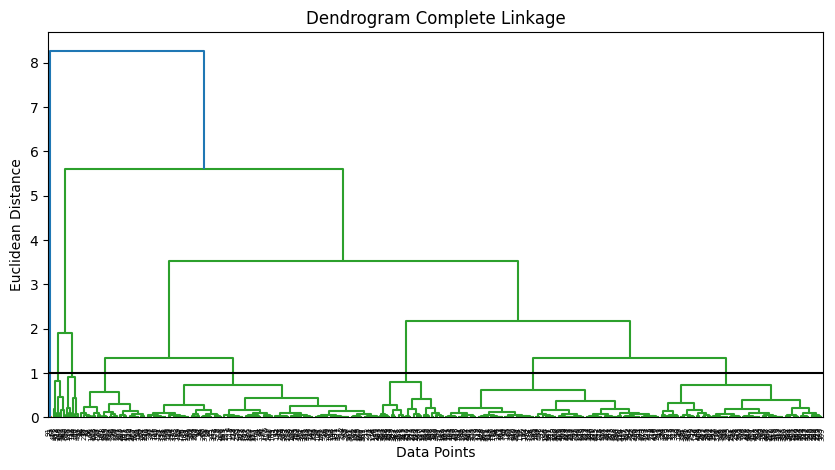

Nilai k optimal untuk metode Complete linkage adalah: 2 


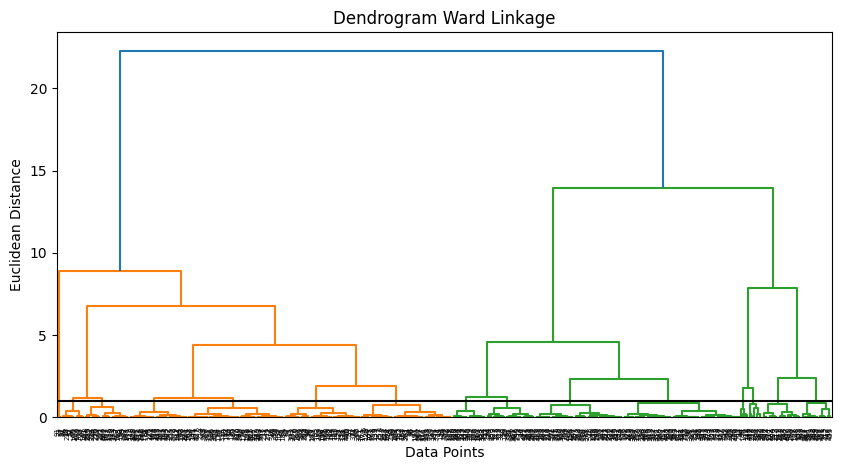

Nilai k optimal untuk metode Ward linkage adalah: 5 


Parameter terbaik: {'linkage': 'single', 'n_clusters': 2}


In [11]:
# Daftar metode linkage yang ingin diuji
linkage_methods = ['single', 'average', 'complete', 'ward']

# Inisialisasi list untuk menyimpan nilai Silhouette Score terbaik dan parameter terbaik
best_silhouette_score = -1
best_params = {}

# Loop melalui setiap metode linkage
for method in linkage_methods:
    # Menghitung dendrogram
    linkage_data = linkage(X_scaled, method=method, metric='euclidean')
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_data)
    plt.title(f"Dendrogram {method.capitalize()} Linkage")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    max_d = 1  # Batas threshold
    plt.axhline(y=max_d, c='k')  # Menambahkan garis horizontal untuk batas threshold
    plt.show()
    
    # Inisialisasi list untuk menyimpan nilai Silhouette Score
    silhouette_scores = []
    k_range = range(2, 11)

    # Loop melalui setiap nilai k
    for k in k_range:
        # Melakukan klasterisasi dengan Agglomerative Clustering
        clusterer = AgglomerativeClustering(n_clusters=k, linkage=method)
        cluster_labels = clusterer.fit_predict(X_scaled)
        
        # Menghitung Silhouette Score
        avg_silhouette_score = silhouette_score(X_scaled, cluster_labels)
        
        # Menambahkan nilai Silhouette Score ke dalam list
        silhouette_scores.append(avg_silhouette_score)
    
    # Mencari nilai k dengan Silhouette Score tertinggi
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"Nilai k optimal untuk metode {method.capitalize()} linkage adalah: {optimal_k} ")
    
    # Memeriksa apakah nilai Silhouette Score terbaik
    if max(silhouette_scores) > best_silhouette_score:
        best_silhouette_score = max(silhouette_scores)
        best_params['linkage'] = method
        best_params['n_clusters'] = optimal_k

print("")
print("")
print("Parameter terbaik:", best_params)

Silhouette Score: 0.766514856173554


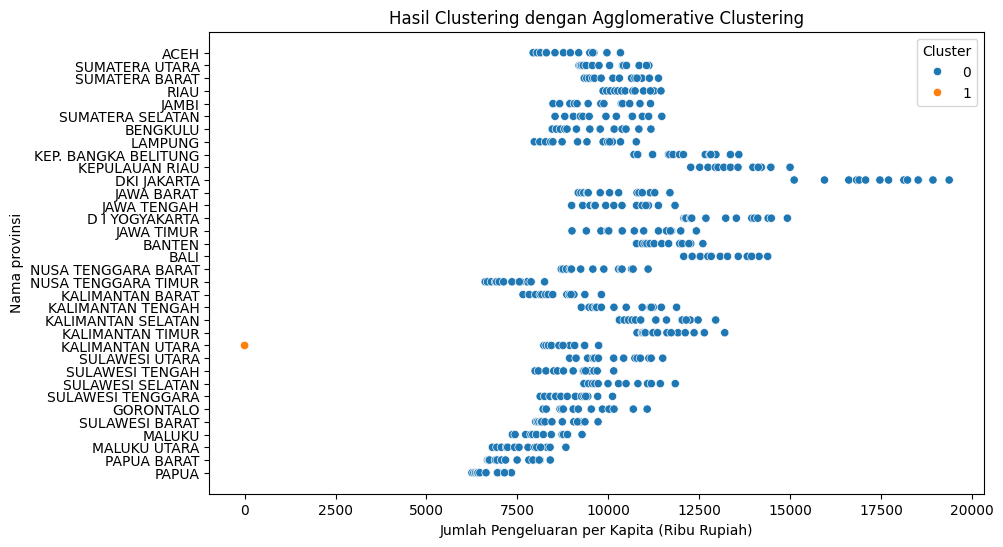

In [12]:

# Inisialisasi Agglomerative Clustering dengan parameter terbaik
clusterer = AgglomerativeClustering(n_clusters=2, linkage='single')
cluster_labels = clusterer.fit_predict(X_scaled)

# Menambahkan label cluster ke dalam data
data['cluster_labels'] = cluster_labels
# Hitung silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='jumlah_pengeluaran_per_kapita', y='nama_provinsi', hue='cluster_labels', data=data, palette='tab10')
plt.title('Hasil Clustering dengan Agglomerative Clustering')
plt.xlabel('Jumlah Pengeluaran per Kapita (Ribu Rupiah)')
plt.ylabel('Nama provinsi')
plt.legend(title='Cluster')
plt.show()

# DBSCAN

In [13]:
# Menggunakan DBSCAN
# eps: jarak maksimum antara dua sampel untuk satu dianggap sebagai bagian dari yang lain
# min_samples: jumlah minimum sampel dalam sebuah cluster
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
silhouette_score_dbscan = silhouette_score(X_scaled, dbscan_labels)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)
print("Silhouette Score for DBSCAN:", silhouette_score_dbscan)
print("Number of clusters:", n_clusters_dbscan)
print("Estimated number of noise points: %d" % n_noise_)

Silhouette Score for DBSCAN: 0.766514856173554
Number of clusters: 1
Estimated number of noise points: 3


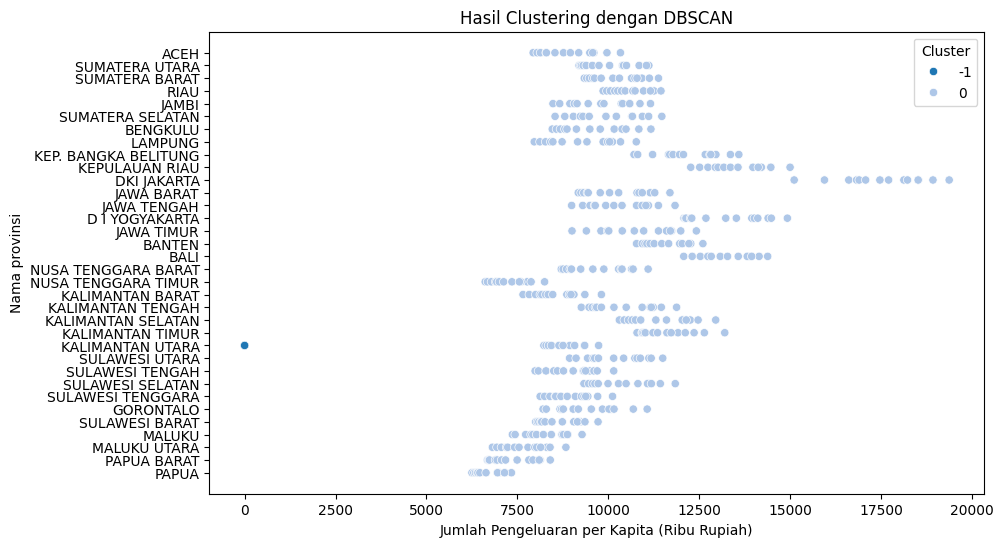

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='jumlah_pengeluaran_per_kapita', y='nama_provinsi', hue=dbscan_labels, data=data, palette='tab20', legend='full')
plt.title('Hasil Clustering dengan DBSCAN')
plt.xlabel('Jumlah Pengeluaran per Kapita (Ribu Rupiah)')
plt.ylabel('Nama provinsi')
plt.legend(title='Cluster', loc='upper right')
plt.show()
